In [1]:
# Imports necessary to acquire, prepare, explore, visualize, analyze, and model data

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import prepare 

from tabulate import tabulate
from IPython.display import Markdown, display

from math import sqrt
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

np.random.seed(123)

using functions created to acquire and wrangle the data

In [2]:
df = acquire.get_zillow_data()

df = prepare.remove_outliers(df)
df = prepare.handle_nulls(df)
df = prepare.rename_columns(df)
df = prepare.prepare_locs(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47936 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   parcelid          47936 non-null  int64         
 1   bathrooms         47936 non-null  float64       
 2   bedrooms          47936 non-null  float64       
 3   square_feet       47936 non-null  int64         
 4   fips              47936 non-null  int64         
 5   garages           47936 non-null  int64         
 6   garage_size       47936 non-null  int64         
 7   lot_size          47936 non-null  int64         
 8   has_pool          47936 non-null  bool          
 9   year_built        47936 non-null  int64         
 10  log_error         47936 non-null  float64       
 11  transaction_date  47936 non-null  datetime64[ns]
 12  county            47936 non-null  object        
 13  latitude          47936 non-null  float64       
 14  longitude         4793

In [4]:
df = df.copy().where((df.square_feet >= 1423) & (df.square_feet < 1988))
df = df.dropna()

In [5]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)
# Splits data into 3 subsets: train, validate, test. Random state specifying that data is split
# with the exact same records when the code is re-run (useful for exploration and modeling, yet
# I suggest dropping this when employing the model)

def printmd(string): # function to format text style
    display(Markdown(string))
print()
printmd('**Number of Train Records:** {:,}'
     .format(len(train)))
printmd('**Number of Validate Records:** {:,}'
     .format(len(validate)))
printmd('**Number of Test Records:** {:,}'
     .format(len(test)))
# returns the amount of records in each subset after splitting


**Number of Train Records:** 8,381

**Number of Validate Records:** 3,593

**Number of Test Records:** 2,994

In [6]:
from sklearn.cluster import KMeans
import sklearn.preprocessing

In [7]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['bathrooms', 'bedrooms', 'square_feet']])
# inserts the 4 selected features into the scaler

train[['scalbathrooms', 'scalbedrooms', 'scalsquare_feet']] = scaler.transform(train[['bathrooms', 'bedrooms', 'square_feet']])

In [8]:
X = train[['scalbathrooms', 'scalbedrooms', 'scalsquare_feet']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

kmeans.predict(X)

train['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scalbathrooms,scalbedrooms,scalsquare_feet
0,0.245288,0.246176,0.190906
1,0.342918,0.769004,0.533570
2,0.415420,0.773545,0.844345
3,0.283593,0.500000,0.149240
4,0.332252,0.482218,0.460703
5,0.365101,0.471100,0.800797
6,0.301605,0.758724,0.191439


In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(validate[['bathrooms', 'bedrooms', 'square_feet']])
# inserts the 4 selected features into the scaler

validate[['scalbathrooms', 'scalbedrooms', 'scalsquare_feet']] = scaler.transform(validate[['bathrooms', 'bedrooms', 'square_feet']])

In [10]:
X = validate[['scalbathrooms', 'scalbedrooms', 'scalsquare_feet']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

kmeans.predict(X)

validate['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scalbathrooms,scalbedrooms,scalsquare_feet
0,0.382044,0.469556,0.440265
1,0.362121,0.461080,0.144632
2,0.366918,0.459510,0.784035
3,0.364543,0.759170,0.255323
4,0.658151,0.674574,0.776522
5,0.345148,0.770886,0.714921
6,0.009375,0.446875,0.245789


In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(test[['bathrooms', 'bedrooms', 'square_feet']])
# inserts the 4 selected features into the scaler

test[['scalbathrooms', 'scalbedrooms', 'scalsquare_feet']] = scaler.transform(test[['bathrooms', 'bedrooms', 'square_feet']])

In [12]:
X = test[['scalbathrooms', 'scalbedrooms', 'scalsquare_feet']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

kmeans.predict(X)

test['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scalbathrooms,scalbedrooms,scalsquare_feet
0,0.386441,0.766949,0.446460
1,0.322891,0.456081,0.135344
2,0.346667,0.776000,0.795773
3,0.681601,0.646057,0.777975
4,0.360380,0.473684,0.778447
5,0.376766,0.468995,0.432599
6,0.348542,0.766160,0.146732


In [13]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['year_built', 'square_feet']])
# inserts the 4 selected features into the scaler

train[['scalyear', 'scalsquare_feet']] = scaler.transform(train[['year_built', 'square_feet']])

In [14]:
X = train[['scalyear', 'scalsquare_feet']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

kmeans.predict(X)

train['cluster2'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scalyear,scalsquare_feet
0,0.681482,0.173818
1,0.726180,0.543577
2,0.165842,0.273905
3,0.449936,0.438179
4,0.418585,0.793244
5,0.431073,0.136903
6,0.725205,0.855490


In [15]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(validate[['year_built', 'square_feet']])
# inserts the 4 selected features into the scaler

validate[['scalyear', 'scalsquare_feet']] = scaler.transform(validate[['year_built', 'square_feet']])

In [16]:
X = validate[['scalyear', 'scalsquare_feet']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

kmeans.predict(X)

validate['cluster2'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scalyear,scalsquare_feet
0,0.425602,0.146966
1,0.725565,0.831660
2,0.452355,0.463118
3,0.414032,0.801321
4,0.671881,0.157469
5,0.173829,0.302451
6,0.736136,0.494392


In [17]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(test[['year_built', 'square_feet']])
# inserts the 4 selected features into the scaler

test[['scalyear', 'scalsquare_feet']] = scaler.transform(test[['year_built', 'square_feet']])

In [18]:
X = test[['scalyear', 'scalsquare_feet']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

kmeans.predict(X)

test['cluster2'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scalyear,scalsquare_feet
0,0.393961,0.803126
1,0.447038,0.460082
2,0.691571,0.157976
3,0.717679,0.817834
4,0.721209,0.483749
5,0.435870,0.134960
6,0.164671,0.246087


Text(0.5, 1.0, 'Change in inertia as k increases')

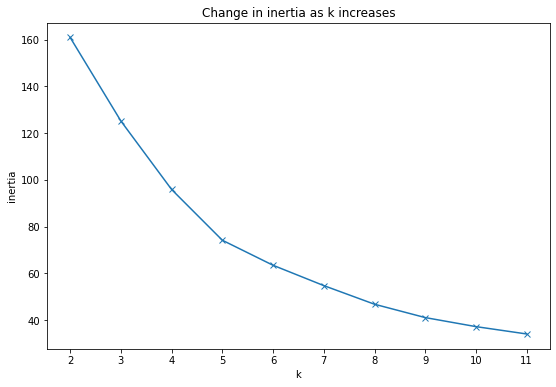

In [19]:
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

In [20]:
kmeans = KMeans(
    init="random",
    n_clusters=30)

In [21]:
coords = train[['latitude', 'longitude']].to_numpy()

In [22]:
train

,parcelid,bathrooms,bedrooms,square_feet,fips,garages,garage_size,lot_size,has_pool,year_built,...,transaction_date,county,latitude,longitude,scalbathrooms,scalbedrooms,scalsquare_feet,cluster,scalyear,cluster2
3596,11891413.0,2.0,2.0,1432.0,6037.0,0.0,0.0,11443.0,False,1948.0,...,2017-01-25,los_angeles,34.124098,-118.090278,0.285714,0.25,0.015957,0,0.361905,5
42408,14209955.0,2.0,3.0,1482.0,6059.0,2.0,420.0,4750.0,False,1973.0,...,2017-07-31,orange,33.855259,-117.807655,0.285714,0.50,0.104610,3,0.600000,0
6710,17250840.0,2.5,4.0,1818.0,6111.0,2.0,517.0,6500.0,True,1964.0,...,2017-02-15,ventura,34.263660,-118.747515,0.428571,0.75,0.700355,2,0.514286,4
26085,10724897.0,3.0,4.0,1955.0,6037.0,0.0,0.0,14862.0,False,1961.0,...,2017-05-23,los_angeles,34.196604,-118.640429,0.571429,0.75,0.943262,2,0.485714,4
17897,11334765.0,1.0,2.0,1475.0,6037.0,0.0,0.0,29534.0,False,1968.0,...,2017-04-14,los_angeles,34.656143,-118.378841,0.000000,0.25,0.092199,0,0.552381,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48311,10895105.0,2.0,2.0,1556.0,6037.0,0.0,0.0,5558.0,True,1956.0,...,2017-08-29,los_angeles,34.165583,-118.423883,0.285714,0.25,0.235816,0,0.438095,5
12289,13927557.0,2.0,3.0,1618.0,6059.0,2.0,457.0,8250.0,False,1959.0,...,2017-03-17,orange,33.783602,-118.083987,0.285714,0.50,0.345745,4,0.466667,3
30945,10719910.0,2.0,4.0,1830.0,6037.0,0.0,0.0,7617.0,True,1964.0,...,2017-06-13,los_angeles,34.207515,-118.616647,0.285714,0.75,0.721631,2,0.514286,4
23737,11324370.0,3.0,3.0,1906.0,6037.0,0.0,0.0,4081.0,False,2005.0,...,2017-05-11,los_angeles,34.561070,-118.165273,0.571429,0.50,0.856383,5,0.904762,6


In [23]:
coords = train[['latitude', 'longitude']].to_numpy()

kmeans.fit(coords)

kmeans.predict(coords)

train['cluster3'] = kmeans.predict(coords)


In [24]:
coords = validate[['latitude', 'longitude']].to_numpy()

kmeans.fit(coords)

kmeans.predict(coords)

validate['cluster3'] = kmeans.predict(coords)


In [25]:
coords = test[['latitude', 'longitude']].to_numpy()

kmeans.fit(coords)

kmeans.predict(coords)

test['cluster3'] = kmeans.predict(coords)


In [26]:
train

,parcelid,bathrooms,bedrooms,square_feet,fips,garages,garage_size,lot_size,has_pool,year_built,...,county,latitude,longitude,scalbathrooms,scalbedrooms,scalsquare_feet,cluster,scalyear,cluster2,cluster3
3596,11891413.0,2.0,2.0,1432.0,6037.0,0.0,0.0,11443.0,False,1948.0,...,los_angeles,34.124098,-118.090278,0.285714,0.25,0.015957,0,0.361905,5,10
42408,14209955.0,2.0,3.0,1482.0,6059.0,2.0,420.0,4750.0,False,1973.0,...,orange,33.855259,-117.807655,0.285714,0.50,0.104610,3,0.600000,0,25
6710,17250840.0,2.5,4.0,1818.0,6111.0,2.0,517.0,6500.0,True,1964.0,...,ventura,34.263660,-118.747515,0.428571,0.75,0.700355,2,0.514286,4,9
26085,10724897.0,3.0,4.0,1955.0,6037.0,0.0,0.0,14862.0,False,1961.0,...,los_angeles,34.196604,-118.640429,0.571429,0.75,0.943262,2,0.485714,4,12
17897,11334765.0,1.0,2.0,1475.0,6037.0,0.0,0.0,29534.0,False,1968.0,...,los_angeles,34.656143,-118.378841,0.000000,0.25,0.092199,0,0.552381,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48311,10895105.0,2.0,2.0,1556.0,6037.0,0.0,0.0,5558.0,True,1956.0,...,los_angeles,34.165583,-118.423883,0.285714,0.25,0.235816,0,0.438095,5,4
12289,13927557.0,2.0,3.0,1618.0,6059.0,2.0,457.0,8250.0,False,1959.0,...,orange,33.783602,-118.083987,0.285714,0.50,0.345745,4,0.466667,3,5
30945,10719910.0,2.0,4.0,1830.0,6037.0,0.0,0.0,7617.0,True,1964.0,...,los_angeles,34.207515,-118.616647,0.285714,0.75,0.721631,2,0.514286,4,12
23737,11324370.0,3.0,3.0,1906.0,6037.0,0.0,0.0,4081.0,False,2005.0,...,los_angeles,34.561070,-118.165273,0.571429,0.50,0.856383,5,0.904762,6,24


In [27]:
xsmall_train = train.copy().where(train.square_feet < 1184)
xsmall_train = xsmall_train.dropna()

xsmall_validate = validate.copy().where(validate.square_feet < 1184)
xsmall_validate = xsmall_validate.dropna()

xsmall_test = test.copy().where(test.square_feet < 1184)
xsmall_test = xsmall_test.dropna()

small = train.copy().where((train.square_feet >= 1184) & (train.square_feet < 1423))
small = small.dropna()

med = train.copy().where((train.square_feet >= 1423) & (train.square_feet < 1988))
med = med.dropna()

large = train.copy().where((train.square_feet >= 1988))
large = large.dropna()

In [28]:
dummy1 = pd.get_dummies(train['cluster'])
dummy2 = pd.get_dummies(train['cluster2'])
dummy3 = pd.get_dummies(train['cluster3'])

dummy4 = pd.get_dummies(validate['cluster'])
dummy5 = pd.get_dummies(validate['cluster2'])
dummy6 = pd.get_dummies(validate['cluster3'])

dummy7 = pd.get_dummies(test['cluster'])
dummy8 = pd.get_dummies(test['cluster2'])
dummy9 = pd.get_dummies(test['cluster3'])


train = pd.concat([train, dummy1, dummy2, dummy3], axis=1)
validate = pd.concat([validate, dummy4, dummy5, dummy6], axis=1)
test = pd.concat([test, dummy7, dummy8, dummy9], axis=1)

In [29]:
validate

,parcelid,bathrooms,bedrooms,square_feet,fips,garages,garage_size,lot_size,has_pool,year_built,...,20,21,22,23,24,25,26,27,28,29
9033,11849117.0,2.0,3.0,1434.0,6037.0,0.0,0.0,11186.0,False,1952.0,...,0,0,0,0,0,0,0,0,0,0
11989,10892670.0,2.0,3.0,1924.0,6037.0,0.0,0.0,11779.0,False,1949.0,...,0,0,0,0,0,0,0,0,0,0
47068,13882893.0,2.5,3.0,1712.0,6059.0,2.0,441.0,2439.0,False,2012.0,...,1,0,0,0,0,0,0,0,0,0
37051,11146734.0,3.0,3.0,1871.0,6037.0,0.0,0.0,6590.0,False,1969.0,...,0,0,0,0,0,0,0,0,0,0
50554,11204817.0,2.0,3.0,1544.0,6037.0,0.0,0.0,7023.0,False,1986.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26939,10719631.0,2.0,3.0,1754.0,6037.0,0.0,0.0,7953.0,True,1956.0,...,0,0,0,0,0,0,0,0,0,0
30825,10952572.0,2.0,4.0,1595.0,6037.0,0.0,0.0,9479.0,False,1948.0,...,0,0,0,0,0,0,0,0,0,0
14755,10808847.0,2.0,2.0,1472.0,6037.0,0.0,0.0,6251.0,False,1952.0,...,0,0,0,0,0,0,0,0,0,0
37166,10725069.0,2.0,3.0,1600.0,6037.0,0.0,0.0,17267.0,True,1962.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train = train.drop(columns=['parcelid', 'cluster', 'cluster2', 'cluster3', 'scalyear', 'bedrooms', 'bathrooms', 'fips', 'garages', 'garage_size', 'lot_size', 'has_pool', 'transaction_date', 'log_error', 'scalbathrooms', 'scalbedrooms', 'scalsquare_feet', 'latitude', 'longitude', 'county'])
# creates dataframe that drops all column except the selected features for modeling
y_train = train[['log_error']]
# creates dataframe of target variable (y) only

X_validate = validate.drop(columns=['parcelid', 'cluster', 'cluster2', 'cluster3', 'scalyear', 'bedrooms', 'bathrooms', 'fips', 'garages', 'garage_size', 'lot_size', 'has_pool', 'transaction_date', 'log_error', 'scalbathrooms', 'scalbedrooms', 'scalsquare_feet', 'latitude', 'longitude', 'county'])
y_validate = validate[['log_error']]
# repeat above for validate set

X_test = test.drop(columns=['parcelid', 'cluster', 'cluster2', 'cluster3', 'scalyear','bedrooms', 'bathrooms', 'fips', 'garages', 'garage_size', 'lot_size', 'has_pool', 'transaction_date', 'log_error', 'scalbathrooms', 'scalbedrooms', 'scalsquare_feet', 'latitude', 'longitude', 'county'])
y_test = test[['log_error']]

In [31]:
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 9033 to 17130
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   square_feet  3593 non-null   float64
 1   year_built   3593 non-null   float64
 2   0            3593 non-null   uint8  
 3   1            3593 non-null   uint8  
 4   2            3593 non-null   uint8  
 5   3            3593 non-null   uint8  
 6   4            3593 non-null   uint8  
 7   5            3593 non-null   uint8  
 8   6            3593 non-null   uint8  
 9   0            3593 non-null   uint8  
 10  1            3593 non-null   uint8  
 11  2            3593 non-null   uint8  
 12  3            3593 non-null   uint8  
 13  4            3593 non-null   uint8  
 14  5            3593 non-null   uint8  
 15  6            3593 non-null   uint8  
 16  0            3593 non-null   uint8  
 17  1            3593 non-null   uint8  
 18  2            3593 non-null   uint8  
 19  3 

In [32]:
scaler = sklearn.preprocessing.MinMaxScaler()
# employs the min max scaler
scaler.fit(X_train[['square_feet', 'year_built']])
# inserts the 4 selected features into the scaler

MinMaxScaler()

In [33]:
X_validate

,square_feet,year_built,0,1,2,3,4,5,6,0,...,20,21,22,23,24,25,26,27,28,29
9033,1434.0,1952.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11989,1924.0,1949.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47068,1712.0,2012.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37051,1871.0,1969.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50554,1544.0,1986.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26939,1754.0,1956.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30825,1595.0,1948.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14755,1472.0,1952.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37166,1600.0,1962.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
v = scaler.transform(X_train[['square_feet', 'year_built']]) 
v1 = scaler.transform(X_validate[['square_feet', 'year_built']]) 
v2 = scaler.transform(X_test[['square_feet', 'year_built']]) 

In [35]:
v = pd.DataFrame(data = v)
v1 = pd.DataFrame(data = v1)
v2 = pd.DataFrame(data = v2)

In [36]:
v.index = X_train.index
v1.index = X_validate.index
v2.index = X_test.index

In [37]:
X_train = pd.concat([X_train, v], axis=1)
X_validate = pd.concat([X_validate, v1], axis=1)
X_test = pd.concat([X_test, v2], axis=1)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 3596 to 39601
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   square_feet  8381 non-null   float64
 1   year_built   8381 non-null   float64
 2   0            8381 non-null   uint8  
 3   1            8381 non-null   uint8  
 4   2            8381 non-null   uint8  
 5   3            8381 non-null   uint8  
 6   4            8381 non-null   uint8  
 7   5            8381 non-null   uint8  
 8   6            8381 non-null   uint8  
 9   0            8381 non-null   uint8  
 10  1            8381 non-null   uint8  
 11  2            8381 non-null   uint8  
 12  3            8381 non-null   uint8  
 13  4            8381 non-null   uint8  
 14  5            8381 non-null   uint8  
 15  6            8381 non-null   uint8  
 16  0            8381 non-null   uint8  
 17  1            8381 non-null   uint8  
 18  2            8381 non-null   uint8  
 19  3 

In [39]:
X_train = X_train.drop(columns=['square_feet', 'year_built'])
# creates dataframe that drops all column except the selected features for modeling
y_train = y_train[['log_error']]
# creates dataframe of target variable (y) only

X_validate = X_validate.drop(columns=['square_feet', 'year_built'])
y_validate = y_validate[['log_error']]
# repeat above for validate set

X_test = X_test.drop(columns=['square_feet', 'year_built'])
y_test = y_test[['log_error']]

In [40]:
#X_validate[['scaledsize', 'scaledyear']] = scaler.transform(X_validate[['square_feet', 'year_built']])

In [41]:
# X_validate[['scaledsize', 'scaledyear']] = scaler.transform(X_validate[['square_feet', 'year_built']])
# X_test[['scaledsize', 'scaledyear']] = data=scaler.transform(X_test[['square_feet', 'year_built']]) 

In [42]:
# X_train

In [43]:
# X_train = X_train.drop(columns = ['square_feet', 'year_built'])
# X_validate = X_validate.drop(columns = ['square_feet', 'year_built'])
# X_test = X_test.drop(columns = ['square_feet','year_built'])

In [44]:
y_train['pred_mean'] = y_train.log_error.mean()
y_validate['pred_mean'] = y_validate.log_error.mean()
# calculates mean prior to computing rmse

rmse_train = mean_squared_error(y_train.log_error, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.pred_mean)**(1/2)
# computes baseline RMSE for train and validate sets (square root of MSE)

print("Baseline RMSE\nTrain/In-Sample: ", (rmse_train)), 
print("Baseline RMSE\nValidate/Out-of-Sample: ", (rmse_validate))

Baseline RMSE
Train/In-Sample:  0.0809056085973658
Baseline RMSE
Validate/Out-of-Sample:  0.0811644301138578


In [45]:
#lm = LinearRegression(normalize=True)
# create the model

In [46]:
#lm.fit(X_train, y_train.log_error)
# fit the model to scaled training data

In [47]:
#y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions

In [48]:
#rmse_train = mean_squared_error(y_train.log_error, y_train.value_predict_lm)**(1/2)

In [49]:
#X_train

In [50]:
#_validate['value_predict_lm'] = lm.predict(X_validate)

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 3596 to 39601
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8381 non-null   uint8  
 1   1       8381 non-null   uint8  
 2   2       8381 non-null   uint8  
 3   3       8381 non-null   uint8  
 4   4       8381 non-null   uint8  
 5   5       8381 non-null   uint8  
 6   6       8381 non-null   uint8  
 7   0       8381 non-null   uint8  
 8   1       8381 non-null   uint8  
 9   2       8381 non-null   uint8  
 10  3       8381 non-null   uint8  
 11  4       8381 non-null   uint8  
 12  5       8381 non-null   uint8  
 13  6       8381 non-null   uint8  
 14  0       8381 non-null   uint8  
 15  1       8381 non-null   uint8  
 16  2       8381 non-null   uint8  
 17  3       8381 non-null   uint8  
 18  4       8381 non-null   uint8  
 19  5       8381 non-null   uint8  
 20  6       8381 non-null   uint8  
 21  7       8381 non-null   uint8  
 

lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.log_error)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions

rmse_train = mean_squared_error(y_train.log_error, y_train.value_predict_lm)**(1/2)
# computes model rmse

In [52]:
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 9033 to 17130
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3593 non-null   uint8  
 1   1       3593 non-null   uint8  
 2   2       3593 non-null   uint8  
 3   3       3593 non-null   uint8  
 4   4       3593 non-null   uint8  
 5   5       3593 non-null   uint8  
 6   6       3593 non-null   uint8  
 7   0       3593 non-null   uint8  
 8   1       3593 non-null   uint8  
 9   2       3593 non-null   uint8  
 10  3       3593 non-null   uint8  
 11  4       3593 non-null   uint8  
 12  5       3593 non-null   uint8  
 13  6       3593 non-null   uint8  
 14  0       3593 non-null   uint8  
 15  1       3593 non-null   uint8  
 16  2       3593 non-null   uint8  
 17  3       3593 non-null   uint8  
 18  4       3593 non-null   uint8  
 19  5       3593 non-null   uint8  
 20  6       3593 non-null   uint8  
 21  7       3593 non-null   uint8  
 

In [53]:
lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.log_error)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions

rmse_train = mean_squared_error(y_train.log_error, y_train.value_predict_lm)**(1/2)
# computes model rmse

y_validate['value_predict_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.value_predict_lm)**(1/2)
# comutes predictions and rmse with validate data

printmd("**OLS Linear Regression Performance**")
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", (rmse_train))
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nValidation/Out-of-Sample: ", (rmse_validate))

**OLS Linear Regression Performance**

---------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  0.08039475757171681
---------------------------------------
RMSE for OLS using LinearRegression
Validation/Out-of-Sample:  0.08219905206270264


In [54]:
y_train['value_predict_lm'].mean() < y_train['log_error'].mean()

False

In [55]:
y_train['value_predict_lm'].mean()

0.010270539622732968

In [56]:
y_train['log_error'].mean()

0.010196605479657311

In [57]:
# small = train.copy().where((train.square_feet >= 1184) & (train.square_feet < 1393))
# small = small.dropna()

In [58]:
# xlarge = train.copy().where(train.square_feet >= 4000)
# xlarge = large.dropna()

In [59]:
# xlarge = train.copy().where(train.square_feet >= 2000)
# xlarge = large.dropna()